In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls '/content/drive/My Drive/Excel'


 4events_2.csv		 'Example CSV for SM.csv'	     MyExample2.pnml
'4events - Copy.pnml'	 'Example CSV for SM.pnml'	     MyExample2.xes
'4events - Copy.xes'	 'Example CSV for SM.xes'	     MyExample3.pnml
 4events.csv		  Examplejulianchanges.csv	     MyExample3.xes
 4events.pnml		  Examplejulianchanges.pnml	     MyExample4.csv
 4events.xes		  Examplejulianchanges.xes	     MyExample4.pnml
 ABC.csv		  Examplejulian.csv		     MyExample4.xes
 ABC.pnml		  Examplejulian.pnml		     MyExample.pnml
 ABC.xes		  Examplejulianwithextratrace.csv    MyExample.xes
'events .csv'		  Examplejulianwithextratrace.pnml  'TestFile (1).csv'
 events.pnml		  Examplejulianwithextratrace.xes    TestFile2.csv
 events.xes		  Examplejulian.xes		     TestFile2.pnml
 Examplebadjulian1.pnml   helpdesk.csv			     TestFile2.xes
 Examplebadjulian1.xes	  helpdesk.pnml			     TestFile.csv
 Examplebadjulian.csv	  helpdesk.xes			     TestFile.pnml
 Examplebadjulian.pnml	  MyExample1.pnml		     TestFile.xes
 Examplebadjulian.xes	 

In [5]:
!pip install pm4py

In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory
from pm4py.algo.discovery.inductive import factory as inductive_miner
import pandas as pd


## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Excel/Examplebadjulian.xes'
log = xes_import_factory.apply(filename)
net, initial_marking, final_marking = inductive_miner.apply(log)


In [0]:
from pm4py.algo.conformance.tokenreplay import factory as token_replay

replay_result = token_replay.apply(log, net, initial_marking, final_marking)

In [11]:
replay_result

[{'activated_transitions': [a, tauSplit_2, b, e, c, g, h],
  'consumed_tokens': 7,
  'enabled_transitions_in_marking': {b, d, c},
  'missing_tokens': 3,
  'produced_tokens': 7,
  'reached_marking': Marking({p_8: 1, p_16: 1, p_11: 1, p_14: 1, sink: 1}),
  'remaining_tokens': 4,
  'trace_fitness': 0.5,
  'trace_is_fit': False,
  'transitions_with_problems': [e, g, h]},
 {'activated_transitions': [a, tauSplit_2, b, e, c, g, h],
  'consumed_tokens': 7,
  'enabled_transitions_in_marking': {b, d, c},
  'missing_tokens': 3,
  'produced_tokens': 7,
  'reached_marking': Marking({p_8: 1, p_16: 1, p_11: 1, p_14: 1, sink: 1}),
  'remaining_tokens': 4,
  'trace_fitness': 0.5,
  'trace_is_fit': False,
  'transitions_with_problems': [e, g, h]},
 {'activated_transitions': [a, tauSplit_2, c, b, e, g, h],
  'consumed_tokens': 7,
  'enabled_transitions_in_marking': {b, d, c},
  'missing_tokens': 3,
  'produced_tokens': 7,
  'reached_marking': Marking({p_11: 1, p_8: 1, p_16: 1, p_14: 1, sink: 1}),
  'rema

In [0]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(replay_result, variant="token_replay")

In [13]:
log_fitness

{'average_trace_fitness': 0.48986828774062807,
 'log_fitness': 0.4898682877406281,
 'perc_fit_traces': 0.0}

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter
filename = "/content/drive/My Drive/Eventlog/Combining/Examplebadjulian_events_xes_csv.csv"
csv_exporter.export(log, filename)

In [0]:
filename =  "/content/drive/My Drive/Eventlog/Combining/Examplebadjulian_events_xes_csv.csv"
df_eventslog = pd.read_csv(filename)

In [21]:
df_eventslog.head()

case:concept:name  ...             time:timestamp
0                 88  ...  2013-03-17 17:56:00-05:00
1                 88  ...  2013-03-18 17:56:00-05:00
2                 88  ...  2013-03-19 17:56:00-05:00
3                 88  ...  2013-03-20 17:56:00-05:00
4                 88  ...  2013-03-21 17:56:00-05:00

[5 rows x 4 columns]

# Exploring  PNML file

In [14]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer
filename = '/content/drive/My Drive/Excel/Examplebadjulian.pnml'
net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function import_net.
  after removing the cwd from sys.path.


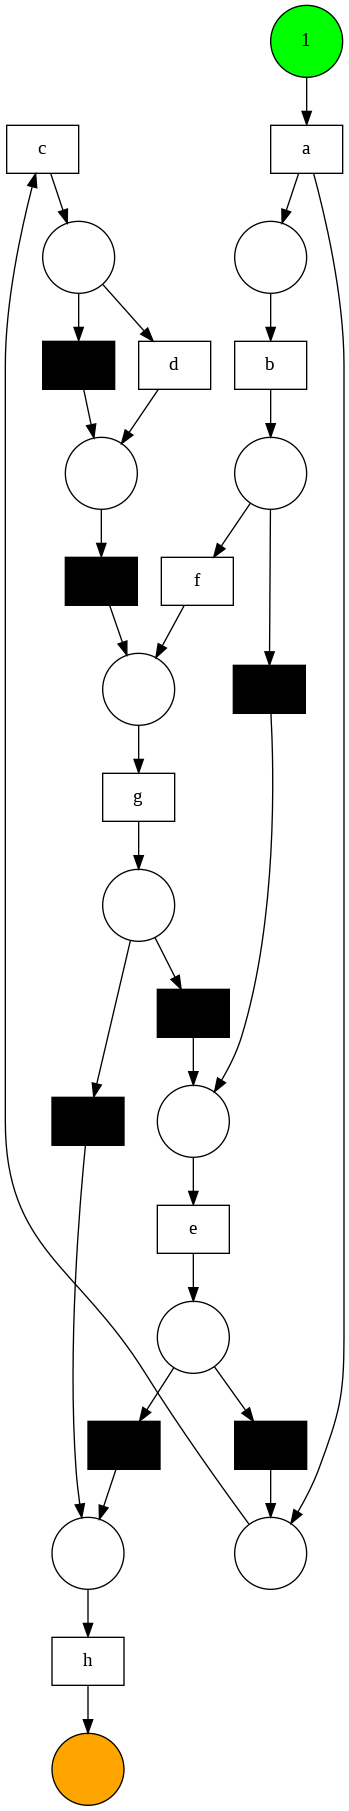

In [0]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

In [0]:
#File path
filename = '/content/drive/My Drive/Excel/Examplebadjulian.xes'
log = xes_import_factory.apply(filename)


In [0]:
from pm4py.algo.conformance.tokenreplay import factory as token_replay

replay_result = token_replay.apply(log, net, initial_marking, final_marking)

In [0]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(replay_result, variant="token_replay")

In [18]:
log_fitness

{'average_trace_fitness': 0.899506079027356,
 'log_fitness': 0.8995060790273557,
 'perc_fit_traces': 71.63120567375887}